In [1]:
import yfinance as yf
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')


from data_downloader import DataDownloader
from data_downloader import BetaCalculator
from data_downloader import ClimateDataCleaner
from var_model import ClimateVAR
from dice_model import DiceModel

In [2]:
downloader = DataDownloader()

assets = ['AAPL', 'IBM', 'TSLA', 'GOOG', 'NVDA', 'NEE', 'FSLR', 'VWDRY', 'BEP'] 
benchmark = '^GSPC'  
start_date = '2014-11-01'
end_date = '2024-05-31'
rf = .065

asset_prices, benchmark_prices = downloader.download_data(start_date=start_date, end_date=end_date,
                                                                      assets=assets, benchmark=benchmark)

[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
asset_prices.head()

,Date,AAPL,BEP,FSLR,GOOG,IBM,NEE,NVDA,TSLA,VWDRY
0,2014-12-01,-0.071891,0.004221,-0.086066,-0.028478,-0.010668,0.018201,-0.043872,-0.090422,-0.017129
1,2015-01-01,0.061424,0.039767,-0.051121,0.015426,-0.044441,0.027754,-0.042394,-0.084574,0.078838
2,2015-02-01,0.100776,-0.030332,0.411862,0.044676,0.063701,-0.045986,0.153383,-0.001277,0.076154
3,2015-03-01,-0.031371,0.026324,0.000669,-0.018625,-0.008893,0.005703,-0.051224,-0.071653,-0.007800
4,2015-04-01,0.005786,0.032932,-0.002007,-0.016760,0.067228,-0.029986,0.060679,0.197489,0.094161


In [4]:
cleaner = ClimateDataCleaner('Data/Temperature.csv', 'Data/Drought_Severity.csv', 'Data/CO2_Emissions.xlsx')

# Clean and prepare the data
climate_data = cleaner.clean_and_prepare_data()

climate_data

,Date,Temperature,DSCI,Coal,Natural Gas,Petroleum,Total CO2 Emissions
0,2014-12-01,-1.134168,104.00,-0.107713,-0.079697,0.035305,-0.045066
1,2015-01-01,-0.100921,103.25,-0.140308,-0.024601,0.005973,-0.049579
2,2015-02-01,-0.348977,111.25,-0.117793,0.071572,0.034858,-0.002740
3,2015-03-01,0.936614,117.20,-0.185240,0.017076,0.057500,-0.029565
4,2015-04-01,0.092542,125.25,-0.163193,0.027977,0.012721,-0.034143
...,...,...,...,...,...,...,...
109,2024-01-01,4.009622,98.80,0.167510,0.120100,0.010273,0.081480
110,2024-02-01,-5.464459,72.75,-0.041299,0.006871,0.007048,0.000088
111,2024-03-01,0.806495,74.25,-0.210958,-0.074042,-0.042391,-0.078618
112,2024-04-01,0.234115,63.00,-0.072617,-0.010663,0.001523,-0.012618


In [5]:
beta_calculator = BetaCalculator(asset_prices, benchmark_prices, climate_data)
beta_calculator.calculate_betas()

,AAPL,BEP,FSLR,GOOG,IBM,NEE,NVDA,TSLA,VWDRY
^GSPC,1.232026,0.844012,1.434337,1.042808,0.902862,0.433603,1.792392,1.803709,1.098690
Temperature,-0.000077,-0.000147,-0.000048,0.000056,-0.000100,-0.000137,-0.000053,-0.000029,0.000038
DSCI,-0.000115,-0.000248,-0.000005,-0.000082,0.000108,-0.000175,-0.000298,-0.000218,0.000023
Coal,-0.052268,-0.082746,-0.053704,0.025630,-0.000106,-0.027577,-0.030725,-0.224546,-0.084166
Natural Gas,-0.115456,-0.225010,-0.218183,-0.110132,-0.060039,-0.088086,-0.180428,-0.503500,-0.241052
Petroleum,-0.136904,-0.160589,-0.269848,-0.047935,-0.008234,-0.025969,0.031836,-0.492924,-0.269338
Total CO2 Emissions,-0.178912,-0.270285,-0.294148,-0.046293,-0.025022,-0.069590,-0.031429,-0.737550,-0.376075


<Axes: title={'center': 'Asset Returns'}, xlabel='Date'>

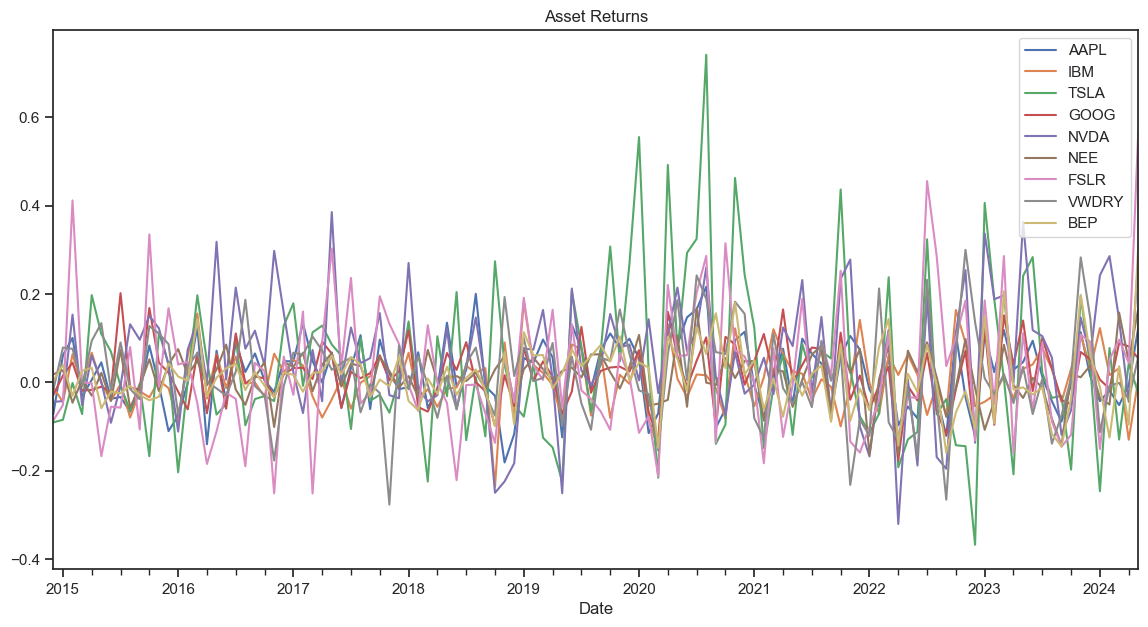

In [6]:
asset_prices.plot(x='Date', y=assets, figsize=(14, 7), title='Asset Returns')

<Axes: title={'center': 'Calculated Betas'}>

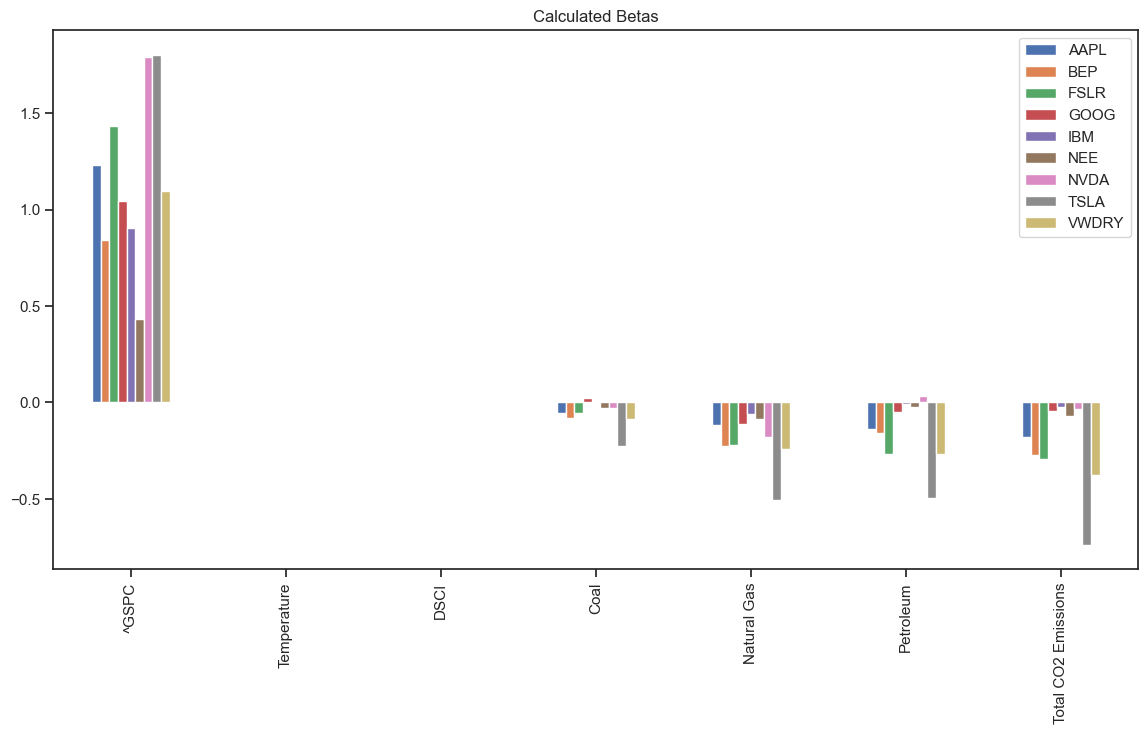

In [7]:
# Assuming beta_calculator.calculate_betas() returns a DataFrame
betas = beta_calculator.calculate_betas()

# Plot the betas
betas.plot(kind='bar', figsize=(14, 7), title='Calculated Betas')

In [8]:
# Longitud de asset_prices
len_asset_prices = len(asset_prices)
print(f"Longitud de asset_prices: {len_asset_prices}")

# Longitud de climate_data
len_climate_data = len(climate_data)
print(f"Longitud de climate_data: {len_climate_data}")

Longitud de asset_prices: 114
Longitud de climate_data: 114


In [10]:

# Supongamos que asset_prices tiene una columna llamada 'Date' que contiene las fechas
asset_prices_clean = asset_prices.drop(columns=['Date'])

# Lo mismo para climate_data si tiene una columna de fechas
climate_data_clean = climate_data.drop(columns=['Date'])

# Ahora, asegúrate de que estás pasando solo valores numéricos
var_model = ClimateVAR(endog=asset_prices_clean.values, exog=benchmark_prices.values, climate_data=climate_data_clean.values)

# Ajustar el modelo VAR
params = var_model.fit(maxlags=5)


In [12]:
params

array([[ 8.32609232e-02,  4.18727623e-01, -1.89330189e-01, ...,
         4.85325664e-02,  1.50667561e-01,  9.87819729e-02],
       [ 3.61459477e-02, -2.30967995e-01, -3.06256786e-01, ...,
         4.58516486e-02,  8.21781783e-02, -2.66855336e-03],
       [-9.10353314e-02, -1.85882298e-01, -1.09719557e-01, ...,
         3.10678014e-02, -9.19107082e-02,  7.55929505e-03],
       ...,
       [ 4.92579186e-01,  1.06396484e+00, -5.60434156e-01, ...,
         4.90461287e-01, -2.50101070e-01,  7.81335937e-02],
       [-1.09606400e+00, -2.62404479e+00,  3.77544840e-01, ...,
        -5.39407922e-01,  9.41150217e-01,  9.87158085e-02],
       [ 7.96575522e-02,  5.63271887e-02,  6.71685962e-02, ...,
         3.51716321e-02, -2.39307852e-03,  4.14345586e-03]])